In [1]:
import pandas as pd
import numpy as np

In [2]:
connectivity = pd.read_csv('raw_metrics_feb26.csv')
link = pd.read_csv('boardex_crsp_comp_link.csv')
crsp = pd.read_csv('crsp.csv')

In [3]:
factors = pd.read_csv('factors.csv')
factors = factors.rename(columns= {'Unnamed: 0': 'date'})

factors['date'] = pd.to_datetime(factors['date'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)
# Filter dates
factors = factors[(factors['date'] >= '1990-01-31') & (factors['date'] <= '2024-12-31')]
# Convert to decimal for consistent format
factors[['Mkt-RF','RF']] = factors[['Mkt-RF','RF']] / 100

In [4]:
factors

,date,Mkt-RF,SMB,HML,RF
762,1990-01-31,-0.0785,-1.24,0.85,0.0057
763,1990-02-28,0.0111,0.99,0.64,0.0057
764,1990-03-31,0.0183,1.50,-2.92,0.0064
765,1990-04-30,-0.0336,-0.46,-2.59,0.0069
766,1990-05-31,0.0842,-2.53,-3.83,0.0068
...,...,...,...,...,...
1174,2024-05-31,0.0434,0.78,-1.66,0.0044
1175,2024-06-30,0.0277,-3.06,-3.31,0.0041
1176,2024-07-31,0.0124,6.80,5.73,0.0045
1177,2024-08-31,0.0161,-3.55,-1.13,0.0048


In [5]:
connectivity.columns

Index(['company_linking', 'year', 'betweenness', 'closeness', 'degree',
       'eigenvector'],
      dtype='object')

In [8]:
connectivity['betweenness_log'] = np.log1p(connectivity['betweenness'])
# connectivity['degree_log'] = np.log1p(connectivity['degree'])
# connectivity['eigenvector_log'] = np.log1p(connectivity['eigenvector'])


Summary Statistics:
                                 betweenness  \
count 118,763.000000000000000000000000000000   
mean        0.031179158822119936583794341800   
std         0.065894518268131418992084036290   
min         0.000000000000000000000000000000   
25%         0.000000000000000000000000000000   
50%         0.009775336117480600689466641029   
75%         0.033997300452191445141458814305   
max         1.000000000000000000000000000000   

                                   closeness  \
count 118,763.000000000000000000000000000000   
mean        0.107552180006455264105191815815   
std         0.154776430955374272313562755699   
min         0.000000000000000000000000000000   
25%         0.052246022133738245774026154322   
50%         0.068271767200834193589642495681   
75%         0.084469807440570351952935368445   
max         1.000000000000000000000000000000   

                                      degree  \
count 118,763.000000000000000000000000000000   
mean        0.0996

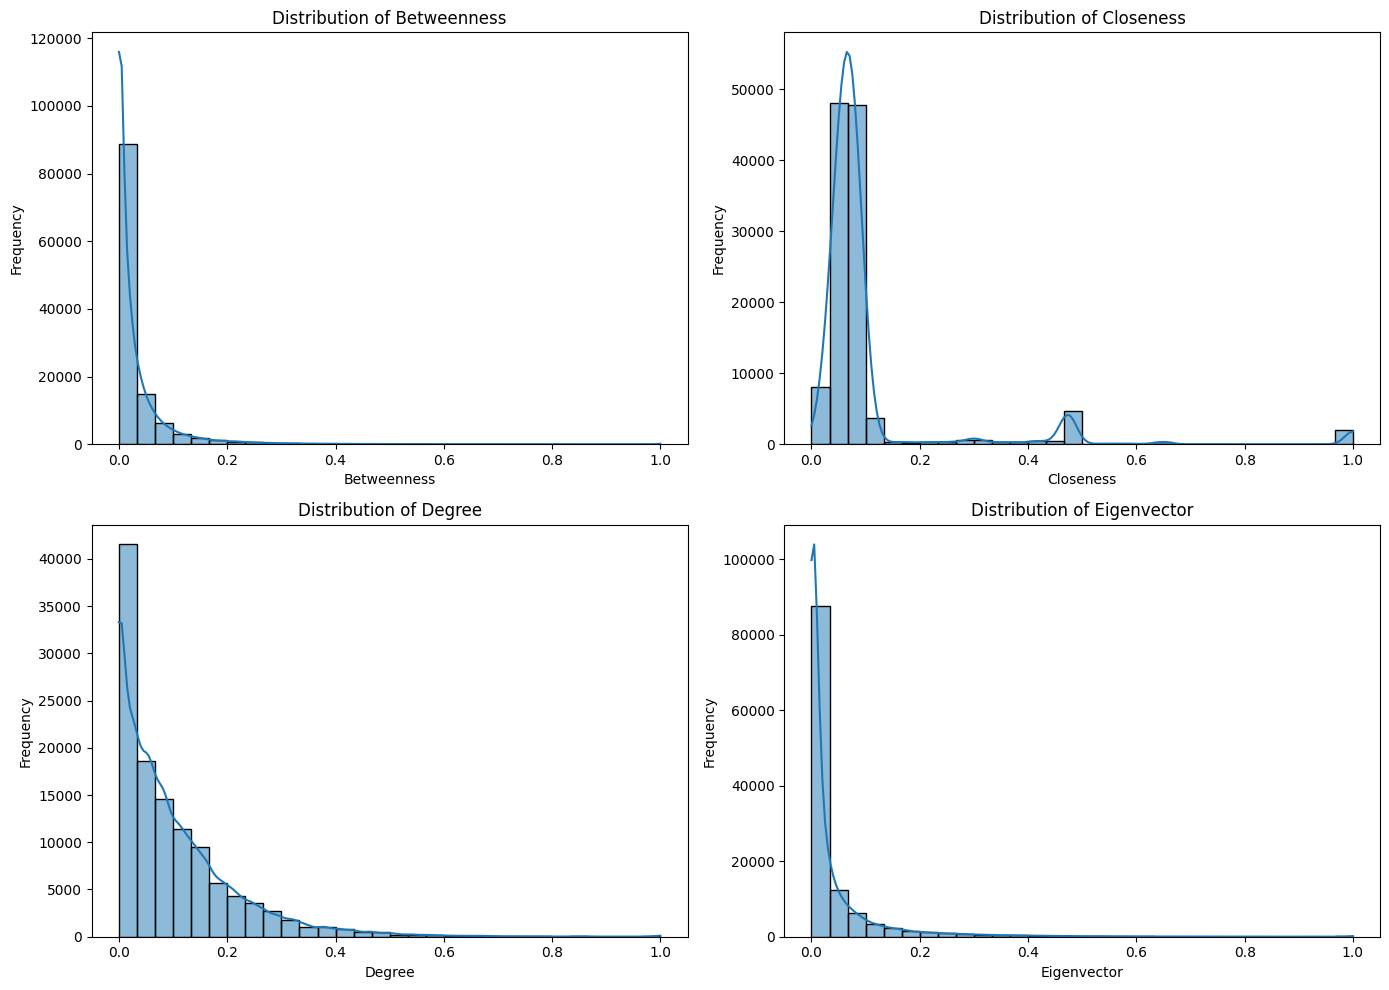

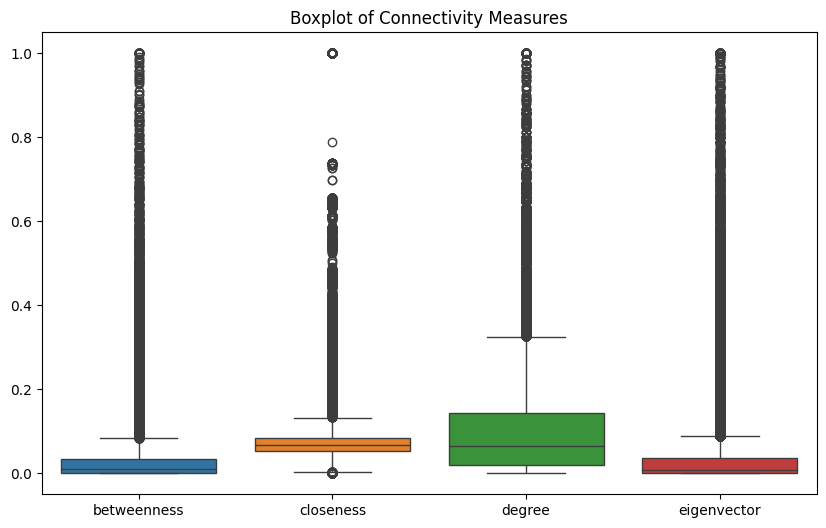

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:,.30f}'.format)

# Display summary statistics for the connectivity measures
print("Summary Statistics:")
print(connectivity[['betweenness', 'closeness', 'degree', 'eigenvector']].describe())

# Plot histograms with KDE for each connectivity measure
plt.figure(figsize=(14, 10))
centrality_measures = ['betweenness', 'closeness', 'degree', 'eigenvector']

for i, col in enumerate(centrality_measures, 1):
    plt.subplot(2, 2, i)
    sns.histplot(connectivity[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot a boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=connectivity[centrality_measures])
plt.title("Boxplot of Connectivity Measures")
plt.show()



In [10]:
zero_count = (connectivity['betweenness'] == 0).sum()
nonzero_count = (connectivity['betweenness'] != 0).sum()
print(zero_count)
print(nonzero_count)

connectivity['betweenness_log'] = np.log1p(connectivity['betweenness'])



32395
86368


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the centrality columns
centrality_cols = ['betweenness_log', 'closeness', 'degree', 'eigenvector']

# Instantiate a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the columns, and create new normalized columns
connectivity[[col + '_norm' for col in centrality_cols]] = scaler.fit_transform(connectivity[centrality_cols])

# Display summary statistics of the normalized columns
print(connectivity[[col + '_norm' for col in centrality_cols]].describe())


                        betweenness_log_norm  \
count 118,763.000000000000000000000000000000   
mean        0.041879794395906992654499134687   
std         0.079747390027302494930339094026   
min         0.000000000000000000000000000000   
25%         0.000000000000000000000000000000   
50%         0.014034344934267042881437248525   
75%         0.048232419086773940797296944538   
max         1.000000000000000000000000000000   

                              closeness_norm  \
count 118,763.000000000000000000000000000000   
mean        0.107552180006455264105191815815   
std         0.154776430955374272313562755699   
min         0.000000000000000000000000000000   
25%         0.052246022133738245774026154322   
50%         0.068271767200834193589642495681   
75%         0.084469807440570351952935368445   
max         1.000000000000000000000000000000   

                                 degree_norm  \
count 118,763.000000000000000000000000000000   
mean        0.099694529191052469463407

Summary Statistics:
       betweenness  closeness     degree  eigenvector
count   118,763.00 118,763.00 118,763.00   118,763.00
mean          0.03       0.11       0.10         0.04
std           0.07       0.15       0.11         0.09
min           0.00       0.00       0.00         0.00
25%           0.00       0.05       0.02         0.00
50%           0.01       0.07       0.06         0.01
75%           0.03       0.08       0.14         0.04
max           1.00       1.00       1.00         1.00


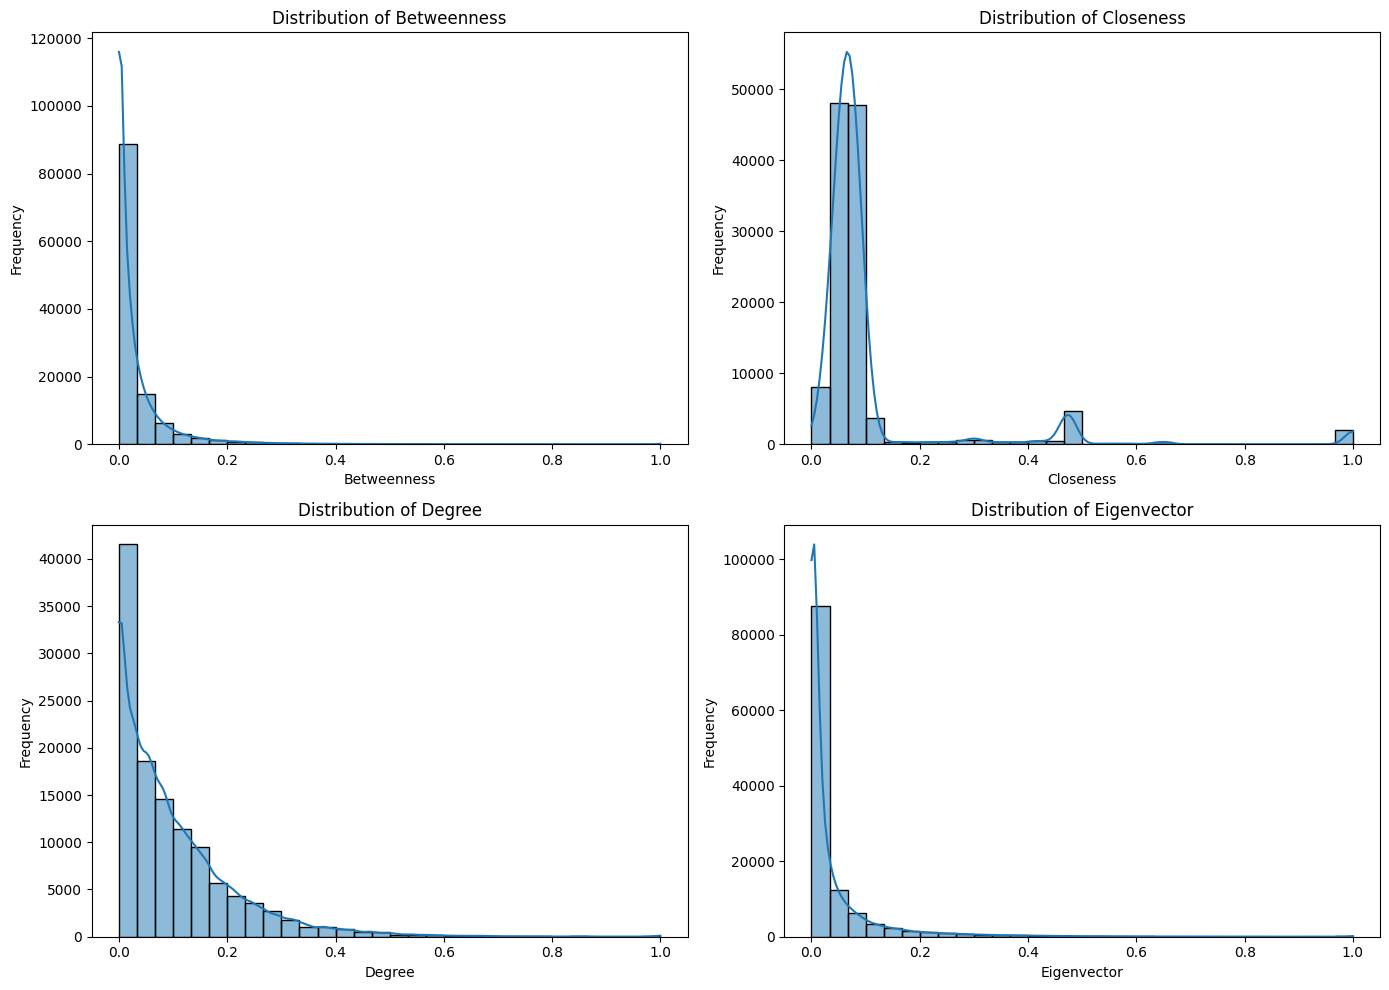

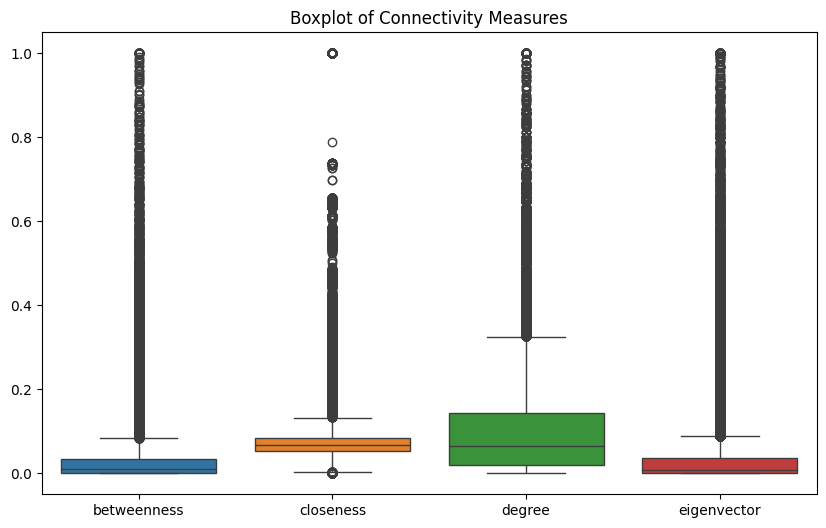

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:,.2f}'.format)

# Display summary statistics for the connectivity measures
print("Summary Statistics:")
print(connectivity[['betweenness', 'closeness', 'degree', 'eigenvector']].describe())

# Plot histograms with KDE for each connectivity measure
plt.figure(figsize=(14, 10))
centrality_measures = ['betweenness', 'closeness', 'degree', 'eigenvector']

for i, col in enumerate(centrality_measures, 1):
    plt.subplot(2, 2, i)
    sns.histplot(connectivity[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot a boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=connectivity[centrality_measures])
plt.title("Boxplot of Connectivity Measures")
plt.show()



In [13]:
# Calculate connectivity score as 0.25 times each centrality measure
connectivity['connectivity_score'] = (
    0.30 * connectivity['betweenness'] +
    0.20 * connectivity['closeness'] +
    0.10 * connectivity['degree'] +
    0.40 * connectivity['eigenvector']
)

# Display the first few rows to verify the new column
print(connectivity.head(10))


   company_linking  year  betweenness  closeness  degree  eigenvector  \
0            11608  1968         0.00       0.00    0.00         1.00   
1            16506  1968         0.00       0.00    0.00         1.00   
2            21015  1968         0.00       1.00    0.00         0.00   
3            21515  1968         0.00       1.00    0.00         0.00   
4             2366  1968         0.00       0.00    0.00         1.00   
5            24085  1968         0.00       1.00    0.00         0.00   
6             2643  1968         0.00       0.00    0.00         1.00   
7            32126  1968         0.00       1.00    0.00         0.00   
8            10146  1969         0.00       0.00    0.00         1.00   
9            11608  1969         0.00       0.00    0.00         1.00   

   betweenness_log  betweenness_log_norm  closeness_norm  degree_norm  \
0             0.00                  0.00            0.00         0.00   
1             0.00                  0.00          

count   118,763.00
mean          0.06
std           0.06
min           0.00
25%           0.02
50%           0.04
75%           0.07
max           0.86
Name: connectivity_score, dtype: float64


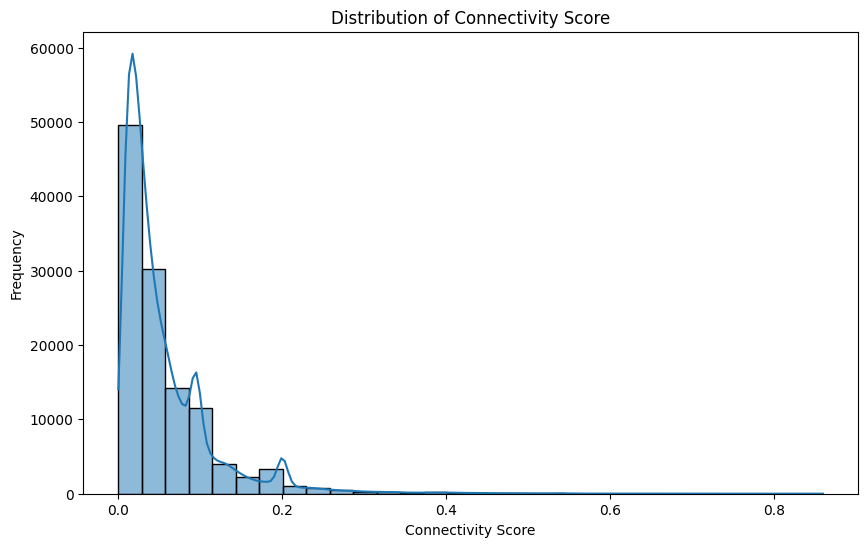

Connectivity Score Summary Statistics:
count   118,763.00
mean          0.06
std           0.06
min           0.00
25%           0.02
50%           0.04
75%           0.07
max           0.86
Name: connectivity_score, dtype: float64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas to show floats in plain decimal notation
pd.set_option('display.float_format', '{:,.2f}'.format)

# Now when you print DataFrames or Series, you'll see decimal numbers instead of scientific notation
print(connectivity['connectivity_score'].describe())

# Plot a histogram with a KDE curve for the connectivity score
plt.figure(figsize=(10, 6))
sns.histplot(connectivity['connectivity_score'].dropna(), kde=True, bins=30)
plt.title("Distribution of Connectivity Score")
plt.xlabel("Connectivity Score")
plt.ylabel("Frequency")
plt.show()

# Optionally, print summary statistics for the connectivity score
print("Connectivity Score Summary Statistics:")
print(connectivity['connectivity_score'].describe())


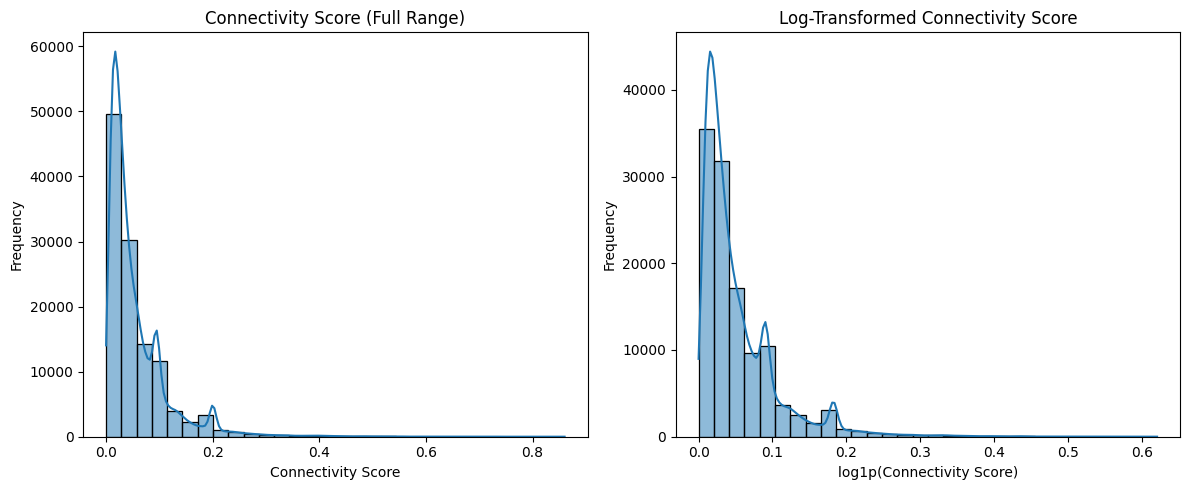

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame: connectivity_clean with column 'connectivity_score'

plt.figure(figsize=(12, 5))

# --- Subplot 1: Original Distribution ---
plt.subplot(1, 2, 1)
sns.histplot(connectivity['connectivity_score'], bins=30, kde=True)
plt.title("Connectivity Score (Full Range)")
plt.xlabel("Connectivity Score")
plt.ylabel("Frequency")

# --- Subplot 2: Log-Transformed Distribution ---
# log1p(x) = ln(x + 1) handles zero/near-zero values gracefully
score_log = np.log1p(connectivity['connectivity_score'])

plt.subplot(1, 2, 2)
sns.histplot(score_log, bins=30, kde=True)
plt.title("Log-Transformed Connectivity Score")
plt.xlabel("log1p(Connectivity Score)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [626]:
link.columns

Index(['PERMCO', 'GVKEY', 'companyid', 'score', 'preferred', 'duplicate'], dtype='object')

In [16]:


connectivity_linked = connectivity.merge(link, left_on='company_linking', right_on='companyid', how='inner')

print(connectivity_linked.head())


   company_linking  year  betweenness  closeness  degree  eigenvector  \
0            11608  1968         0.00       0.00    0.00         1.00   
1            16506  1968         0.00       0.00    0.00         1.00   
2            21015  1968         0.00       1.00    0.00         0.00   
3            21515  1968         0.00       1.00    0.00         0.00   
4             2366  1968         0.00       0.00    0.00         1.00   

   betweenness_log  betweenness_log_norm  closeness_norm  degree_norm  \
0             0.00                  0.00            0.00         0.00   
1             0.00                  0.00            0.00         0.00   
2             0.00                  0.00            1.00         0.00   
3             0.00                  0.00            1.00         0.00   
4             0.00                  0.00            0.00         0.00   

   eigenvector_norm  connectivity_score  PERMCO  GVKEY  companyid  score  \
0              1.00                0.40    944

In [17]:
total_rows = connectivity.shape[0]

#count how many rows have a non-null 'companyid' after merging
matched_rows = connectivity_linked['companyid'].notnull().sum()
merge_rate = matched_rows / total_rows * 100

print(f"Total rows in connectivity: {total_rows}")
print(f"Matched rows in linking table: {matched_rows}")
print(f"Merge Rate: {merge_rate:.2f}%")


Total rows in connectivity: 118763
Matched rows in linking table: 127721
Merge Rate: 107.54%


In [18]:
import pandas as pd

# Create a column 'match' that indicates if the merge was successful (non-null 'companyid' from the linking table)
connectivity_linked['match'] = connectivity_linked['companyid'].notnull()

# Group by the 'year' column from your connectivity DataFrame (assuming it's in merged_df)
merge_by_year = connectivity_linked.groupby('year')['match'].agg(total='count', matched='sum')

# Calculate the merge rate per year as a percentage
merge_by_year['merge_rate'] = (merge_by_year['matched'] / merge_by_year['total']) * 100

# Display the result
print(merge_by_year.head(50))


      total  matched  merge_rate
year                            
1968      8        8      100.00
1969     15       15      100.00
1970     20       20      100.00
1971     23       23      100.00
1972     27       27      100.00
1973     36       36      100.00
1974     37       37      100.00
1975     47       47      100.00
1976     61       61      100.00
1977     72       72      100.00
1978     79       79      100.00
1979    106      106      100.00
1980    128      128      100.00
1981    158      158      100.00
1982    186      186      100.00
1983    240      240      100.00
1984    290      290      100.00
1985    343      343      100.00
1986    405      405      100.00
1987    516      516      100.00
1988    603      603      100.00
1989    730      730      100.00
1990    847      847      100.00
1991   1012     1012      100.00
1992   1160     1160      100.00
1993   1402     1402      100.00
1994   1682     1682      100.00
1995   1994     1994      100.00
1996   236

In [19]:
crsp.columns
# connectivity_linked['year'] = pd.to_datetime(connectivity_linked['year'], format='%Y-%m-%d').dt.year


Index(['PERMNO', 'HdrCUSIP', 'Ticker', 'PERMCO', 'SICCD', 'MthCalDt', 'MthPrc',
       'MthCap', 'MthRet', 'ShrOut'],
      dtype='object')

In [20]:
import pandas as pd

# Ensure CRSP dates are in datetime format and extract the year
crsp['MthCalDt'] = pd.to_datetime(crsp['MthCalDt'])
crsp['year'] = crsp['MthCalDt'].dt.year

# Make sure the year in connectivity_linked is in the same format (e.g., integer)
connectivity_linked['year'] = connectivity_linked['year'].astype(int)

# Merge on the pair: ('permco_company', 'year') from connectivity_linked and ('PERMCO', 'year') from CRSP
merged_df = connectivity_linked.merge(
    crsp,
    left_on=['PERMCO', 'year'],
    right_on=['PERMCO', 'year'],
    how='inner'
)

# The merged DataFrame now repeats each connectivity record for each monthly observation in that year
print(merged_df.head())


   company_linking  year  betweenness  closeness  degree  eigenvector  \
0            14272  1969         0.00       0.00    0.00         1.00   
1            14272  1969         0.00       0.00    0.00         1.00   
2            14272  1969         0.00       0.00    0.00         1.00   
3            14272  1969         0.00       0.00    0.00         1.00   
4            14272  1969         0.00       0.00    0.00         1.00   

   betweenness_log  betweenness_log_norm  closeness_norm  degree_norm  ...  \
0             0.00                  0.00            0.00         0.00  ...   
1             0.00                  0.00            0.00         0.00  ...   
2             0.00                  0.00            0.00         0.00  ...   
3             0.00                  0.00            0.00         0.00  ...   
4             0.00                  0.00            0.00         0.00  ...   

   match  PERMNO  HdrCUSIP  Ticker  SICCD   MthCalDt  MthPrc     MthCap  \
0   True   39765 

In [21]:
merged_df.shape

(1262661, 28)

year
1969       74
1970      101
1971       92
1972      122
1973      340
1974      342
1975      439
1976      572
1977      725
1978      743
1979      954
1980     1090
1981     1414
1982     1581
1983     2011
1984     2513
1985     3078
1986     3568
1987     4512
1988     5282
1989     6103
1990     7188
1991     8491
1992    10022
1993    12075
1994    15033
1995    17737
1996    21669
1997    25035
1998    28053
1999    30967
2000    34587
2001    37176
2002    38635
2003    40638
2004    43910
2005    46094
2006    46858
2007    46663
2008    44484
2009    41222
2010    39928
2011    38834
2012    38760
2013    39117
2014    40889
2015    42012
2016    41318
2017    40317
2018    40217
2019    40308
2020    40429
2021    46793
2022    50216
2023    47194
2024    44136
Name: count, dtype: int64


C:\Users\desti\AppData\Local\Temp\ipykernel_48704\311738775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


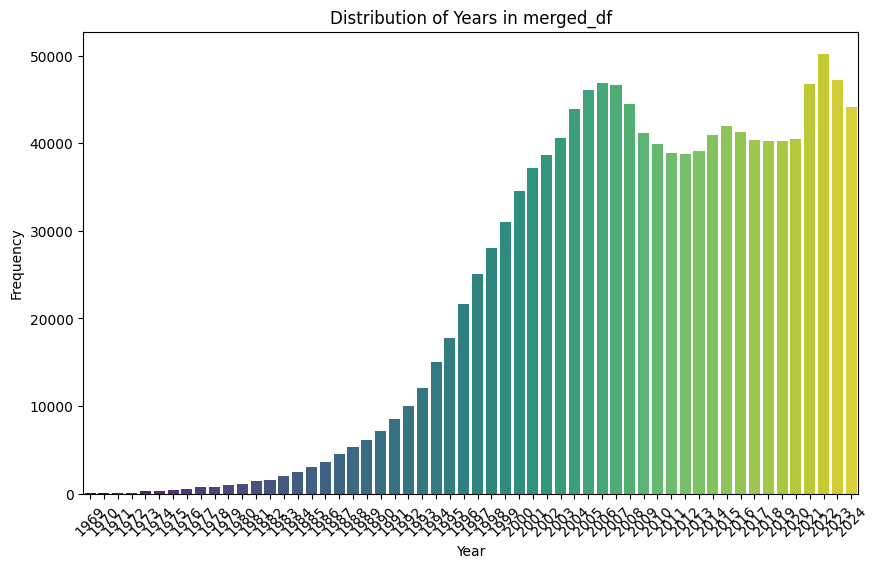

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts for each year
year_counts = merged_df['year'].value_counts().sort_index()
print(year_counts)

# Plot the distribution of years
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years in merged_df')
plt.xticks(rotation=45)
plt.show()


In [23]:
start_year = 1998  # Change this as needed
end_year = 2024 # Change this as needed

# Filter the merged_df using the dynamic years
merged_df = merged_df[(merged_df['year'] >= start_year) & (merged_df['year'] <= end_year)]
merged_df.shape


(1109755, 28)

In [24]:
merged_df.columns
merged_df.dropna(subset=['MthRet'], inplace=True)
merged_df.isnull().sum()
# merged_df.duplicated().sum()
# merged_df['company_linking'].nunique()



company_linking            0
year                       0
betweenness                0
closeness                  0
degree                     0
eigenvector                0
betweenness_log            0
betweenness_log_norm       0
closeness_norm             0
degree_norm                0
eigenvector_norm           0
connectivity_score         0
PERMCO                     0
GVKEY                      0
companyid                  0
score                      0
preferred                  0
duplicate                  0
match                      0
PERMNO                     0
HdrCUSIP                   0
Ticker                  5706
SICCD                      0
MthCalDt                   0
MthPrc                     0
MthCap                     0
MthRet                     0
ShrOut                     0
dtype: int64

In [25]:
merged_df.shape

(1101921, 28)

In [26]:
indices_to_drop = merged_df.groupby('MthCalDt')['MthCap'].nlargest(250).index.get_level_values(1)

# Drop those rows
merged_df = merged_df.drop(indices_to_drop)
merged_df.shape

(1020921, 28)

        year  connectivity_score  connectivity_quintile
152906  1998                0.06                      4
152907  1998                0.06                      4
152908  1998                0.06                      4
152909  1998                0.06                      4
152910  1998                0.06                      4
152911  1998                0.06                      4
152912  1998                0.01                      1
152913  1998                0.01                      1
152914  1998                0.01                      1
152915  1998                0.01                      1
152916  1998                0.01                      1
152917  1998                0.01                      1
152918  1998                0.01                      1
152919  1998                0.01                      1
152920  1998                0.01                      1
152921  1998                0.01                      1
152922  1998                0.01                

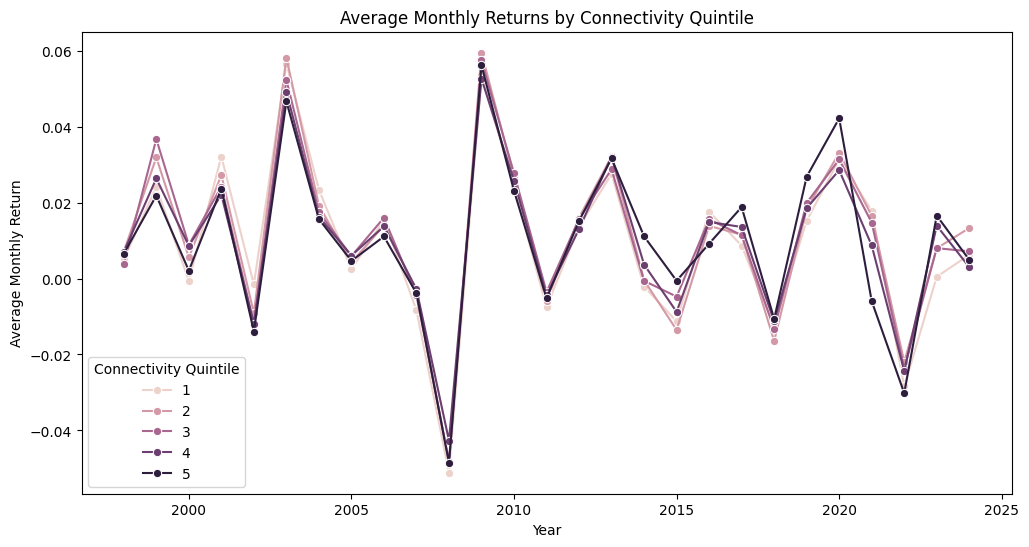

In [27]:
import pandas as pd

# Ensure connectivity_score is numeric
merged_df['connectivity_score'] = pd.to_numeric(merged_df['connectivity_score'], errors='coerce')

# Create quintile labels for connectivity scores within each year using pd.qcut.
# This assigns quintile values 1 (lowest) to 5 (highest).
merged_df['connectivity_quintile'] = merged_df.groupby('year')['connectivity_score'].transform(
    lambda x: pd.qcut(x, 5, labels=False, duplicates='drop') + 1
)

# Check a sample of the data with the new quintile column
print(merged_df[['year', 'connectivity_score', 'connectivity_quintile']].head(30))

# Now, since your merged_df has monthly returns (e.g., 'MthRet'), you can group by year and quintile
# to compute average monthly returns for each portfolio.
portfolio_returns = merged_df.groupby(['year', 'connectivity_quintile'])['MthRet'].mean().reset_index()

# Rename the column for clarity
portfolio_returns.rename(columns={'MthRet': 'avg_monthly_return'}, inplace=True)

# Display the portfolio returns by year and quintile
print(portfolio_returns)

# Optionally, you can visualize the average monthly returns for each quintile over the years:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=portfolio_returns, x='year', y='avg_monthly_return', hue='connectivity_quintile', marker='o')
plt.title("Average Monthly Returns by Connectivity Quintile")
plt.xlabel("Year")
plt.ylabel("Average Monthly Return")
plt.legend(title='Connectivity Quintile')
plt.show()


In [28]:
merged_df.columns
# merged_df.isnull().sum()
# merged_df.duplicated().sum()
merged_df['company_linking'].nunique()



8847

In [29]:
merged_df.shape

(1020921, 29)

Filtered data shape: (1020921, 29)
[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
Average Monthly Returns by Connectivity Quintile (1998-2024):
   connectivity_quintile  MthRet
0                      1    0.01
1                      2    0.01
2                      3    0.01
3                      4    0.01
4                      5    0.01


C:\Users\desti\AppData\Local\Temp\ipykernel_48704\162416917.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='connectivity_quintile', y='MthRet', data=avg_monthly_returns, palette='viridis')


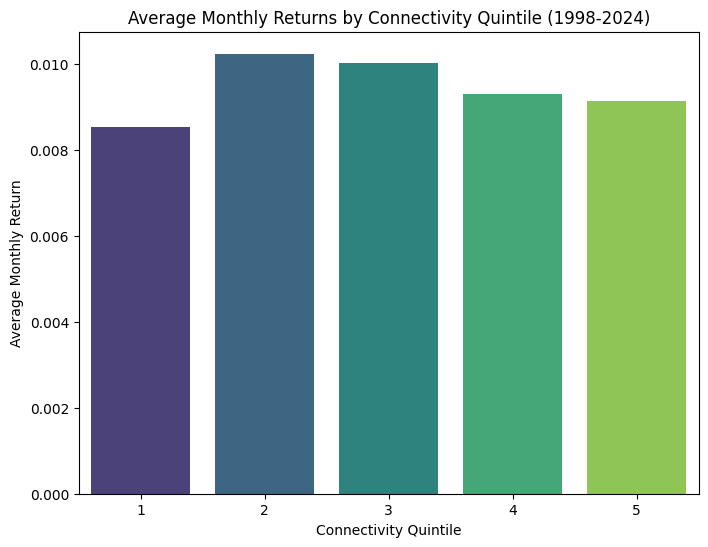

In [30]:
# Define dynamic start and end years
# start_year = 1990  # Change this as needed
# end_year = 2024 # Change this as needed

# Filter the merged_df using the dynamic years
merged_filtered = merged_df[(merged_df['year'] >= start_year) & (merged_df['year'] <= end_year)]

# Display the filtered data shape to verify
print("Filtered data shape:", merged_filtered.shape)
print(merged_filtered['year'].unique())

# Group by connectivity quintile and compute the average monthly return
avg_monthly_returns = merged_filtered.groupby('connectivity_quintile')['MthRet'].mean().reset_index()

print("Average Monthly Returns by Connectivity Quintile ({}-{}):".format(start_year, end_year))
print(avg_monthly_returns)

# Visualize the results with a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='connectivity_quintile', y='MthRet', data=avg_monthly_returns, palette='viridis')
plt.xlabel('Connectivity Quintile')
plt.ylabel('Average Monthly Return')
plt.title(f'Average Monthly Returns by Connectivity Quintile ({start_year}-{end_year})')
plt.show()


In [31]:
# Number of unique firms in the connectivity DataFrame
unique_firms_connectivity = connectivity['company_linking'].nunique()
print("Unique firms in connectivity:", unique_firms_connectivity)

# Number of unique firms in the merged DataFrame (should be similar)
unique_firms_merged = merged_df['PERMCO'].nunique()
print("Unique firms in merged_df:", unique_firms_merged)

# Check monthly duplication: count the number of rows per firm-year in merged_df
firm_year_counts = merged_df.groupby(['company_linking', 'year']).size().reset_index(name='monthly_count')

# Display a sample of these counts
print("Sample firm-year counts (each firm-year should have ~12 rows if monthly):")
print(firm_year_counts.head())

# Optionally, show summary statistics of monthly_count to see the distribution
print("Monthly counts summary:")
print(firm_year_counts['monthly_count'].describe())


Unique firms in connectivity: 9003
Unique firms in merged_df: 8870
Sample firm-year counts (each firm-year should have ~12 rows if monthly):
   company_linking  year  monthly_count
0                3  2005             12
1                3  2006             12
2                3  2007              9
3                6  1999              5
4                6  2000             12
Monthly counts summary:
count   88,511.00
mean        11.53
std          3.82
min          1.00
25%         12.00
50%         12.00
75%         12.00
max        252.00
Name: monthly_count, dtype: float64


Correlation Matrix:
                    betweenness  closeness  degree  eigenvector  \
betweenness                1.00      -0.03    0.79         0.44   
closeness                 -0.03       1.00   -0.06        -0.01   
degree                     0.79      -0.06    1.00         0.62   
eigenvector                0.44      -0.01    0.62         1.00   
connectivity_score         0.67       0.41    0.75         0.83   
MthCap                     0.18      -0.02    0.26         0.17   

                    connectivity_score  MthCap  
betweenness                       0.67    0.18  
closeness                         0.41   -0.02  
degree                            0.75    0.26  
eigenvector                       0.83    0.17  
connectivity_score                1.00    0.19  
MthCap                            0.19    1.00  


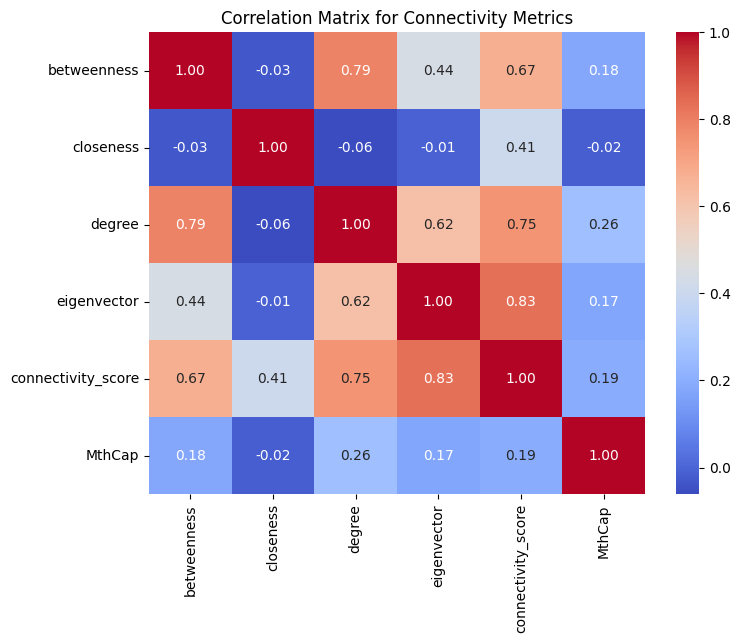

In [32]:
# Compute correlation matrix for connectivity metrics and monthly returns
corr_cols = ['betweenness', 'closeness', 'degree', 'eigenvector', 'connectivity_score', 'MthCap']
correlation_matrix = merged_df[corr_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Connectivity Metrics")
plt.show()
# Pairplot to visually inspect relationships
# sns.pairplot(merged_df[corr_cols].dropna())
# plt.suptitle("Scatter Matrix of Connectivity Metrics and MthRet", y=1.02)
# plt.show()







In [33]:
import pandas as pd
# Sort by firm and year for proper tracking
merged_df = merged_df.sort_values(by=['PERMCO', 'year'])
# Create a shifted column to track previous year's quintile for each firm
merged_df['prev_quintile'] = merged_df.groupby('PERMCO')['connectivity_quintile'].shift(1)
# Drop the first year for each firm (since it has no previous quintile)
merged_df = merged_df.dropna(subset=['prev_quintile'])
# Count transitions
transition_counts = merged_df.groupby(['prev_quintile', 'connectivity_quintile']).size().unstack().fillna(0)
print("Firm Transitions Between Quintiles:")
print(transition_counts)

Firm Transitions Between Quintiles:
connectivity_quintile       1       2       3       4       5
prev_quintile                                                
1.00                   197147    3172     855     342     603
2.00                     2942  194782    3508     820     337
3.00                      722    3352  194443    3474     540
4.00                      350     726    3395  195379    2762
5.00                      757     362     485    2714  198082


Filtered data shape: (1020921, 29)
[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
Average MthCap by Connectivity Quintile (1998-2024):
   connectivity_quintile       MthCap
0                      1   760,350.51
1                      2 1,222,950.51
2                      3 1,826,625.38
3                      4 2,741,435.59
4                      5 3,172,680.79


C:\Users\desti\AppData\Local\Temp\ipykernel_48704\3336816743.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='connectivity_quintile', y='MthCap', data=avg_mthcap, palette='viridis')


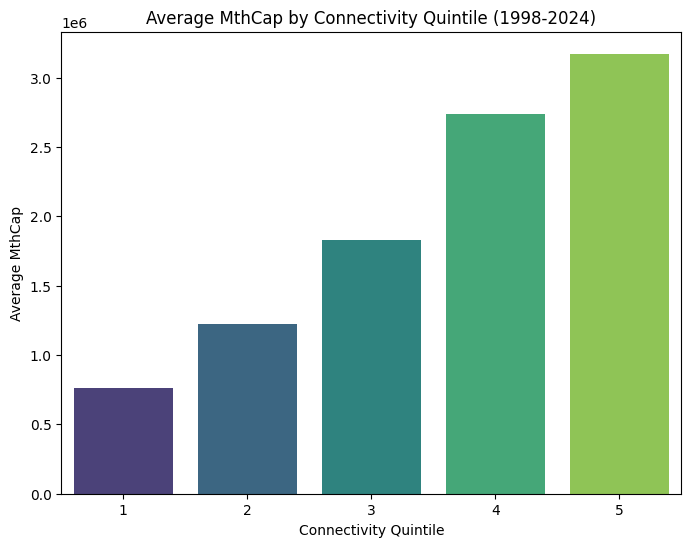

In [34]:
# Display the filtered data shape to verify
print("Filtered data shape:", merged_filtered.shape)
print(merged_filtered['year'].unique())

# Group by connectivity quintile and compute the average monthly return
avg_mthcap = merged_filtered.groupby('connectivity_quintile')['MthCap'].mean().reset_index()

print("Average MthCap by Connectivity Quintile ({}-{}):".format(start_year, end_year))
print(avg_mthcap)

# Visualize the results with a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='connectivity_quintile', y='MthCap', data=avg_mthcap, palette='viridis')
plt.xlabel('Connectivity Quintile')
plt.ylabel('Average MthCap')
plt.title(f'Average MthCap by Connectivity Quintile ({start_year}-{end_year})')
plt.show()


### regressions

In [35]:
monthly_portfolio_returns = (
    merged_df
    .groupby(['MthCalDt', 'connectivity_quintile'])['MthRet']
    .mean()  # equal weighted return for the portfolio in that month
    .reset_index()
)

# --- STEP 2: (Optional) Add Year Information for Clarity ---
# If desired, extract the year from the date column.
monthly_portfolio_returns['year'] = monthly_portfolio_returns['MthCalDt'].dt.year

# --- STEP 3: (Optional) Sort the Results for Easier Viewing ---
monthly_portfolio_returns = monthly_portfolio_returns.sort_values(['year', 'MthCalDt', 'connectivity_quintile'])

# Display the first several rows to verify the output.
print("Monthly Portfolio Returns (each month has 5 connectivity_quintile):")
print(monthly_portfolio_returns.head(20))

Monthly Portfolio Returns (each month has 5 connectivity_quintile):
     MthCalDt  connectivity_quintile  MthRet  year
0  1998-01-30                      1   -0.01  1998
1  1998-01-30                      2    0.06  1998
2  1998-01-30                      3    0.01  1998
3  1998-01-30                      4   -0.01  1998
4  1998-01-30                      5   -0.00  1998
5  1998-02-27                      1    0.07  1998
6  1998-02-27                      2    0.07  1998
7  1998-02-27                      3    0.07  1998
8  1998-02-27                      4    0.08  1998
9  1998-02-27                      5    0.09  1998
10 1998-03-31                      1    0.05  1998
11 1998-03-31                      2    0.06  1998
12 1998-03-31                      3    0.05  1998
13 1998-03-31                      4    0.06  1998
14 1998-03-31                      5    0.05  1998
15 1998-04-30                      1    0.03  1998
16 1998-04-30                      2    0.02  1998
17 1998-04-30 

In [36]:
# Create a 'year_month' column in both DataFrames
monthly_portfolio_returns['year_month'] = monthly_portfolio_returns['MthCalDt'].dt.strftime('%Y-%m')
factors['year_month'] = factors['date'].dt.strftime('%Y-%m')

monthly_portfolio_returns = monthly_portfolio_returns[(monthly_portfolio_returns['year_month'] >= f'{start_year}-01-31') & (monthly_portfolio_returns['year_month'] <= f'{end_year}-09-31')]
factors = factors[(factors['year_month'] >= f'{start_year}-01-31') & (factors['year_month'] <= f'{end_year}-09-31')]

# calculating excess returns
excess = monthly_portfolio_returns.merge(factors, on='year_month', how='left')
excess['Excess_Returns'] = excess['MthRet']- excess['RF']

print(excess.head(-20))

       MthCalDt  connectivity_quintile  MthRet  year year_month       date  \
0    1998-02-27                      1    0.07  1998    1998-02 1998-02-28   
1    1998-02-27                      2    0.07  1998    1998-02 1998-02-28   
2    1998-02-27                      3    0.07  1998    1998-02 1998-02-28   
3    1998-02-27                      4    0.08  1998    1998-02 1998-02-28   
4    1998-02-27                      5    0.09  1998    1998-02 1998-02-28   
...         ...                    ...     ...   ...        ...        ...   
1575 2024-05-31                      1    0.02  2024    2024-05 2024-05-31   
1576 2024-05-31                      2    0.10  2024    2024-05 2024-05-31   
1577 2024-05-31                      3    0.03  2024    2024-05 2024-05-31   
1578 2024-05-31                      4    0.04  2024    2024-05 2024-05-31   
1579 2024-05-31                      5    0.02  2024    2024-05 2024-05-31   

      Mkt-RF  SMB   HML   RF  Excess_Returns  
0       0.07 0.3

In [37]:
monthly_portfolio_returns['year_month']
factors['year_month']

859     1998-02
860     1998-03
861     1998-04
862     1998-05
863     1998-06
         ...   
1174    2024-05
1175    2024-06
1176    2024-07
1177    2024-08
1178    2024-09
Name: year_month, Length: 320, dtype: object

In [38]:
# Compute the average monthly return for each portfolio.
avg_portfolio_returns = excess.groupby('connectivity_quintile')['Excess_Returns'].mean()

# Display the results.
# print("Average monthly return for each connectivity_quintile from", start_date, 'to', end_date, ":")
print(avg_portfolio_returns)

connectivity_quintile
1   0.01
2   0.01
3   0.01
4   0.01
5   0.01
Name: Excess_Returns, dtype: float64


In [ ]:
# monthly_pivot = excess.pivot(index='year_month', columns='connectivity_quintile', values='Excess_Returns')
# monthly_pivot['LS'] = monthly_pivot[5] - monthly_pivot[1]
# rf_by_month = excess.drop_duplicates('year_month').set_index('year_month')['RF']

# # Align the risk-free rate with our pivot table.
# monthly_pivot['RF'] = rf_by_month

In [39]:
# ----- Equal Weighted -----
# Pivot on Excess_Returns so that each portfolio's excess return is in its own column.
monthly_pivot_eq = excess.pivot(index='year_month', columns='connectivity_quintile', values='Excess_Returns')
# Compute the LS excess return for each month: Long portfolio 5 minus Short portfolio 1.
monthly_pivot_eq['LS_excess'] = monthly_pivot_eq[5] - monthly_pivot_eq[1]


In [40]:
import statsmodels.api as sm

def run_regressions(ls_series, factors_df):
    """
    Runs CAPM and FF3F regressions on a given LS excess return series.
    
    Parameters:
        ls_series: pandas Series of LS excess returns indexed by 'year_month'
        factors_df: pandas DataFrame with 'year_month', 'Mkt-RF', 'SMB', 'HML'
        
    Returns:
        A dictionary with:
        - Average LS excess return (in %)
        - Sharpe ratio of LS excess returns
        - CAPM regression: alpha (in %), its t-stat, beta (Mkt-RF) and its t-stat
        - FF3F regression: alpha (in %), its t-stat, and coefficients (and t-stats) for Mkt-RF, SMB, and HML
    """
    # Merge LS excess returns with the factor data on 'year_month'
    data = pd.merge(ls_series.to_frame(name='LS_excess'), factors_df, on='year_month', how='inner')
    
    # CAPM Regression: LS_excess ~ constant + Mkt-RF
    X_capm = sm.add_constant(data['Mkt-RF'])
    capm_model = sm.OLS(data['LS_excess'], X_capm).fit()
    
    # FF3F Regression: LS_excess ~ constant + Mkt-RF + SMB + HML
    X_ff = sm.add_constant(data[['Mkt-RF', 'SMB', 'HML']])
    ff3_model = sm.OLS(data['LS_excess'], X_ff).fit()
    
    # Compute average return and Sharpe ratio
    avg_return = data['LS_excess'].mean()
    sharpe_ratio = avg_return / data['LS_excess'].std() * np.sqrt(12)
    
    results = {
        'Avg Return (%)': avg_return * 100,
        'Sharpe Ratio': sharpe_ratio,
        'CAPM Alpha (%)': capm_model.params['const'] * 100,
        'CAPM Alpha t-stat': capm_model.tvalues['const'],
        'CAPM Beta (Mkt-RF)': capm_model.params['Mkt-RF'],
        'CAPM Beta t-stat': capm_model.tvalues['Mkt-RF'],
        'FF3F Alpha (%)': ff3_model.params['const'] * 100,
        'FF3F Alpha t-stat': ff3_model.tvalues['const'],
        'FF3F Mkt Beta': ff3_model.params['Mkt-RF'],
        'FF3F Mkt Beta t-stat': ff3_model.tvalues['Mkt-RF'],
        'FF3F SMB': ff3_model.params['SMB'],
        'FF3F SMB t-stat': ff3_model.tvalues['SMB'],
        'FF3F HML': ff3_model.params['HML'],
        'FF3F HML t-stat': ff3_model.tvalues['HML'],
    }
    return results

# --- Run Regressions for Each Weighting Scheme ---
results_eq     = run_regressions(monthly_pivot_eq['LS_excess'], factors)
# results_vw     = run_regressions(monthly_pivot_vw['LS_excess'], factors)
# results_vw1000 = run_regressions(monthly_pivot_vw1000['LS_excess'], factors)

# --- Create a Summary DataFrame (Metrics as rows, Weighting Schemes as columns) ---
summary_table = pd.DataFrame({
    'Equal Weighted': results_eq
    # 'Value Weighted': results_vw,
    # 'VW no Top 1000': results_vw1000
})

print("Regression Results for LS Portfolio (Pivoted):")
print(summary_table)

Regression Results for LS Portfolio (Pivoted):
                      Equal Weighted
Avg Return (%)                  0.11
Sharpe Ratio                    0.15
CAPM Alpha (%)                  0.02
CAPM Alpha t-stat               0.17
CAPM Beta (Mkt-RF)              0.12
CAPM Beta t-stat                4.25
FF3F Alpha (%)                  0.03
FF3F Alpha t-stat               0.21
FF3F Mkt Beta                   0.14
FF3F Mkt Beta t-stat            4.70
FF3F SMB                       -0.00
FF3F SMB t-stat                -2.57
FF3F HML                       -0.00
FF3F HML t-stat                -1.83


In [41]:
monthly_pivot_eq.head(30)

connectivity_quintile,1,2,3,4,5,LS_excess
year_month,,,,,,
1998-02,0.06,0.07,0.07,0.07,0.09,0.03
1998-03,0.04,0.05,0.04,0.05,0.05,0.01
1998-04,0.02,0.02,0.02,0.01,0.01,-0.01
1998-05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.01
1998-06,-0.02,-0.03,-0.03,-0.03,-0.01,0.01
1998-07,-0.08,-0.08,-0.08,-0.07,-0.06,0.01
1998-08,-0.21,-0.20,-0.22,-0.20,-0.20,0.00
1998-09,0.07,0.06,0.07,0.06,0.06,-0.01
1998-10,0.06,0.05,0.06,0.07,0.05,-0.01
